In [324]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.linalg import block_diag

import random
from itertools import combinations
from math import floor

### Читаем список ребер из входных файлов

In [572]:
X_edges = pd.read_csv('Zig-Zag-algorithm/input/X_edges.txt', sep=',', header=None)
Y_edges = pd.read_csv('Zig-Zag-algorithm/input/Y_edges.txt', sep=',', header=None)

In [573]:
X_edges

,0,1
0,a,b
1,a,d
2,a,h
3,b,c
4,b,j
5,c,d
6,c,f
7,d,e
8,e,f
9,e,h


In [574]:
Y_edges

,0,1
0,1,2
1,1,3
2,2,3


### Создаем графы X, Y из соответствующих таблиц ребер

In [575]:
X = nx.from_pandas_edgelist(X_edges, *X_edges.columns, create_using=nx.Graph())
Y = nx.from_pandas_edgelist(Y_edges, *Y_edges.columns, create_using=nx.Graph())

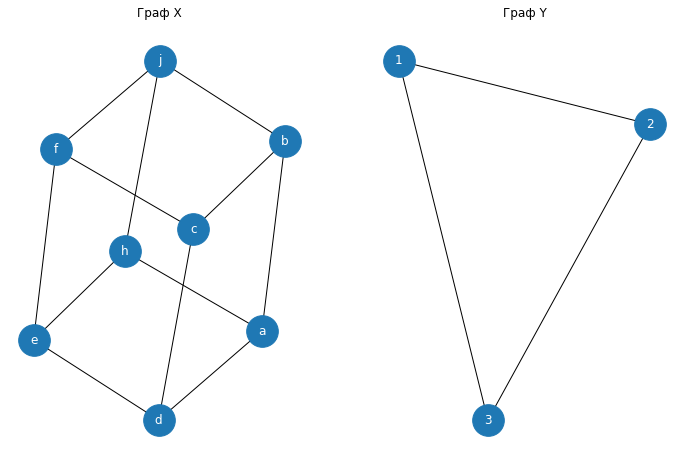

In [576]:
fig, ax = plt.subplots(1,2, figsize = (12,8))

nx.draw(X, ax=ax[0], node_size=1000, font_color='white', with_labels=True)
ax[0].title.set_text('Граф X')

nx.draw(Y, ax=ax[1], node_size=1000, font_color='white', with_labels=True)
ax[1].title.set_text('Граф Y')

In [577]:
nx.algorithms.bipartite.is_bipartite(X)

True

### <font color='red'>To Do</font> 
`Проверка на регулярность и размерность входных графов`

## Алгоритм зиг-заг (из книги "Expander Families and Cayley Graphs"):

### Шаг 1: создаем блочно-диагональную матрицу G размера $|X|\cdot|Y|\times|X|\cdot|Y|$ . Блоки матрицы - это матрицы смежности графа Y

In [578]:
G_np_arr = block_diag(*(X.number_of_nodes() * [nx.to_numpy_array(Y)]))
G_np_arr

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

### Переводим матрицу смежности в граф и присваиваем соответствующие названия вершин

In [579]:
G = nx.from_numpy_array(G_np_arr)

XY = nx.cartesian_product(X, Y)
XY.nodes

NodeView((('a', 1), ('a', 2), ('a', 3), ('b', 1), ('b', 2), ('b', 3), ('d', 1), ('d', 2), ('d', 3), ('h', 1), ('h', 2), ('h', 3), ('c', 1), ('c', 2), ('c', 3), ('j', 1), ('j', 2), ('j', 3), ('f', 1), ('f', 2), ('f', 3), ('e', 1), ('e', 2), ('e', 3)))

In [580]:
mapping = {old_label:new_label for old_label, new_label in enumerate(list(XY.nodes))}
G = nx.relabel_nodes(G, mapping)

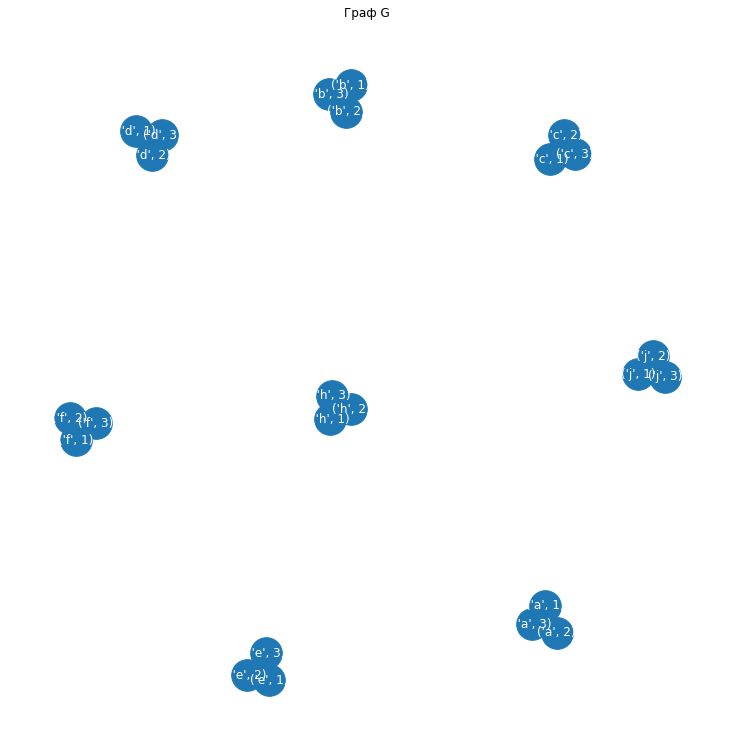

In [581]:
plt.figure(1,figsize=(10,10)) 
nx.draw(G, node_size=1000, font_color='white', with_labels=True) 
plt.title('Граф G');

### Шаг 2: Генерируем рандомный лэйблинг вокруг каждой вершины из графа Х. Создаем таблицу для лэйблинга: вход - $(x_i, y_k)$ выход - $(x_i, x_j)$, где $x_i$ смежна с $x_j$

In [582]:
num_of_nodes_Y = Y.number_of_nodes()

labeling = list()
for n, nbrs in X.adj.items():
    node_labeling = random.sample(list(Y.nodes), num_of_nodes_Y)
    labels = list(zip([n] * num_of_nodes_Y, node_labeling))
    edges = list(zip([n] * num_of_nodes_Y, list(nbrs)))
    labeling.extend(list(zip(labels, edges)))    

In [583]:
labeling

[(('a', 3), ('a', 'b')),
 (('a', 1), ('a', 'd')),
 (('a', 2), ('a', 'h')),
 (('b', 1), ('b', 'a')),
 (('b', 2), ('b', 'c')),
 (('b', 3), ('b', 'j')),
 (('d', 2), ('d', 'a')),
 (('d', 3), ('d', 'c')),
 (('d', 1), ('d', 'e')),
 (('h', 1), ('h', 'a')),
 (('h', 2), ('h', 'e')),
 (('h', 3), ('h', 'j')),
 (('c', 3), ('c', 'b')),
 (('c', 2), ('c', 'd')),
 (('c', 1), ('c', 'f')),
 (('j', 1), ('j', 'b')),
 (('j', 3), ('j', 'f')),
 (('j', 2), ('j', 'h')),
 (('f', 1), ('f', 'c')),
 (('f', 2), ('f', 'e')),
 (('f', 3), ('f', 'j')),
 (('e', 1), ('e', 'd')),
 (('e', 2), ('e', 'f')),
 (('e', 3), ('e', 'h'))]

### Аггрегируем таблицу лэйблинга по ребрам и получаем таблицу смежных вершин

In [584]:
df = pd.DataFrame(labeling)
df[1] = [tuple(sorted(x)) for x in df[1]]
grouped_df = df.groupby(1)[0].agg(list)

grouped_df

1
(a, b)    [(a, 3), (b, 1)]
(a, d)    [(a, 1), (d, 2)]
(a, h)    [(a, 2), (h, 1)]
(b, c)    [(b, 2), (c, 3)]
(b, j)    [(b, 3), (j, 1)]
(c, d)    [(d, 3), (c, 2)]
(c, f)    [(c, 1), (f, 1)]
(d, e)    [(d, 1), (e, 1)]
(e, f)    [(f, 2), (e, 2)]
(e, h)    [(h, 2), (e, 3)]
(f, j)    [(j, 3), (f, 3)]
(h, j)    [(h, 3), (j, 2)]
Name: 0, dtype: object

### Создаем граф H на основе саггрегированной таблицы и декартового произведения вершин графов X, Y

In [585]:
H = nx.Graph()
H.add_nodes_from(XY.nodes)
H.add_edges_from(grouped_df.values)

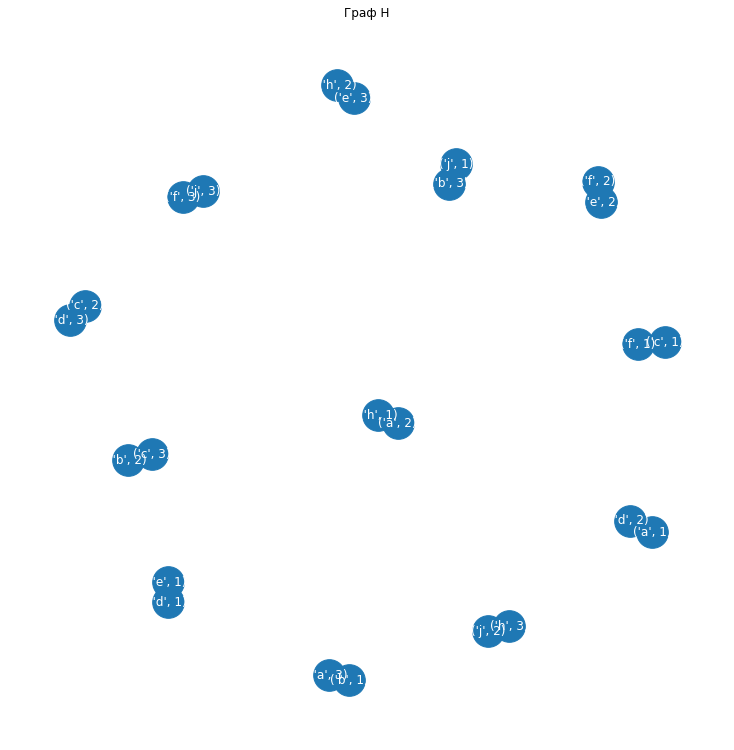

In [586]:
plt.figure(1,figsize=(10,10)) 
nx.draw(H, node_size=1000, font_color='white', with_labels=True)
plt.title('Граф H');

### Переводим граф H в матрицу смежности

In [587]:
H_np_arr = nx.to_numpy_array(H)

### Шаг 3: Получаем зиг-заг произведения путем перемножения матриц смежностей: $G\cdot H\cdot G$ 

In [588]:
zig_zag_np_arr = G_np_arr @ H_np_arr @ G_np_arr

In [589]:
zig_zag = nx.from_numpy_array(zig_zag_np_arr)

In [590]:
mapping = {old_label:new_label for old_label, new_label in enumerate(list(XY.nodes))}
zig_zag = nx.relabel_nodes(zig_zag, mapping)

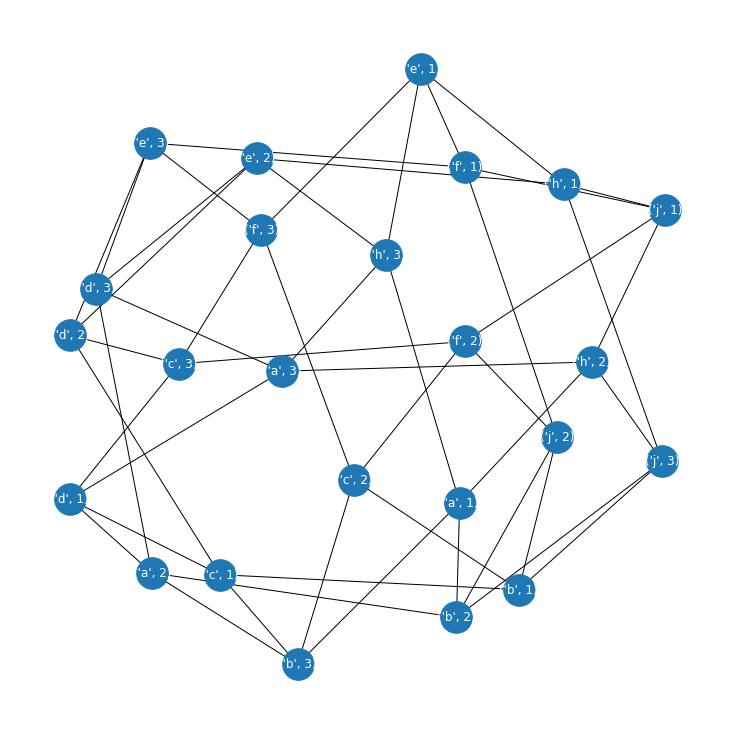

In [591]:
plt.figure(3,figsize=(10,10)) 
nx.draw(zig_zag, node_size=1000, font_color='white', with_labels=True)

## Проверка условий, необходимых к задаче кодирования

### Проверка на двудольность и регулярность графа

In [592]:
nx.algorithms.bipartite.is_bipartite(zig_zag)

True

In [595]:
nx.is_regular(zig_zag)

True

In [594]:
zig_zag.degree()

DegreeView({('a', 1): 4, ('a', 2): 4, ('a', 3): 4, ('b', 1): 4, ('b', 2): 4, ('b', 3): 4, ('d', 1): 4, ('d', 2): 4, ('d', 3): 4, ('h', 1): 4, ('h', 2): 4, ('h', 3): 4, ('c', 1): 4, ('c', 2): 4, ('c', 3): 4, ('j', 1): 4, ('j', 2): 4, ('j', 3): 4, ('f', 1): 4, ('f', 2): 4, ('f', 3): 4, ('e', 1): 4, ('e', 2): 4, ('e', 3): 4})

### Левая (L) и правая (R) доли графа

In [603]:
L, R = nx.algorithms.bipartite.sets(zig_zag)
L, R

({('a', 1),
  ('a', 2),
  ('a', 3),
  ('c', 1),
  ('c', 2),
  ('c', 3),
  ('e', 1),
  ('e', 2),
  ('e', 3),
  ('j', 1),
  ('j', 2),
  ('j', 3)},
 {('b', 1),
  ('b', 2),
  ('b', 3),
  ('d', 1),
  ('d', 2),
  ('d', 3),
  ('f', 1),
  ('f', 2),
  ('f', 3),
  ('h', 1),
  ('h', 2),
  ('h', 3)})

In [607]:
if len(L) < len(R):
    L, R = R, L

In [646]:
node, degree = zip(*nx.degree(zig_zag, L))

In [650]:
d = set(degree).pop()
d

4

### Задаем фиксированные $\gamma$ и $\alpha$

In [719]:
gamma = 1/2
alpha = 1/3

### Создаем подмножества $S \subset L$, $|S|\leq \gamma n$

In [720]:
set_of_nodes_L = set(L)
max_size_of_subset_S = floor(gamma * len(L))
subsets_S = create_subsets_from(set_of_nodes_L, max_size_of_subset_S)

### Проверка граничного условия: $|\partial_v S|\geq d \alpha |S|$ 

In [680]:
def is_satisfy_boundary_condition(graph, subsets, d, alpha):
    for subset in subsets:
        node_boundary = list(nx.algorithms.node_boundary(graph, subset))
        if len(node_boundary) < d * alpha * len(subset):
            print(f'for subset: {subset}, d = {d}, alpha = {alpha}, node_boundary = {node_boundary}')
            return False
    return True

In [704]:
is_satisfy_boundary_condition(zig_zag, subsets_S, d, alpha)

True

## Спектральный пробел

#### Матрица Лапласа: $L = D - A$

In [379]:
print(nx.laplacian_matrix(zig_zag).toarray())

[[ 4.  0.  0. -1. -1.  0.  0.  0.  0. -1.  0. -1.]
 [ 0.  4.  0.  0.  0.  0. -1. -1.  0. -1.  0. -1.]
 [ 0.  0.  4. -1. -1.  0. -1. -1.  0.  0.  0.  0.]
 [-1.  0. -1.  4.  0.  0.  0.  0.  0.  0. -1. -1.]
 [-1.  0. -1.  0.  4.  0.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  4.  0. -1. -1.  0. -1. -1.]
 [ 0. -1. -1.  0.  0.  0.  4.  0.  0. -1. -1.  0.]
 [ 0. -1. -1.  0. -1. -1.  0.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  0.  0.  4. -1. -1.  0.]
 [-1. -1.  0.  0.  0.  0. -1.  0. -1.  4.  0.  0.]
 [ 0.  0.  0. -1.  0. -1. -1.  0. -1.  0.  4.  0.]
 [-1. -1.  0. -1.  0. -1.  0.  0.  0.  0.  0.  4.]]


In [706]:
lambd = nx.algebraic_connectivity(zig_zag)
lambd

1.4384471871911697

## Алгоритм вычисления изопериметрической константы

### Создаем подмножества $S \subset V$, $|S|\leq \frac{|V|}{2}$

In [707]:
def create_subsets_from(set_of_nodes, max_size_subset):
    subsets = set(combinations(set_of_nodes, 1))
    
    for i in range(1, max_size_subset):
        subsets = subsets.union(set(combinations(set_of_nodes, i + 1)))    
        
    return subsets

In [708]:
set_of_nodes_X = set(X.nodes)
max_size_of_subset_X = floor(len(set_of_nodes_X) / 2)
subsets_X = create_subsets_from(set_of_nodes_X, max_size_of_subset_X)

In [275]:
# def adjacency_table(graph):
#     adjacency_table = dict()
#     for n, nbrs in graph.adj.items():
#         adjacency_table[n] = set(nbrs)
        
#     return adjacency_table

In [276]:
# adjacency_table_X = adjacency_table(X)
# adjacency_table_X

{'a': {'b', 'c', 'd'},
 'b': {'a', 'c', 'd'},
 'c': {'a', 'b', 'd'},
 'd': {'a', 'b', 'c'}}

### Вычисление изопериметрической константы путем перебора каждого подмножества $S$

In [710]:
def calculate_isoperimetric(graph, subsets):
    isoperimetric_num = np.inf

    for subset in subsets:
        edge_boundary = list(nx.algorithms.edge_boundary(graph, subset))
    
        # print(f'for subset: {subset}, edge bound: {edge_bound}\n\n')
        isoperimetric_num = min(isoperimetric_num, len(edge_boundary) / len(subset))
        
    return isoperimetric_num

#### Для входного графа Х:

In [712]:
calculate_isoperimetric(X, subsets_X)

1.0

#### Для входного графа Y:

In [713]:
set_of_nodes_Y = set(Y.nodes)
max_size_of_subset_Y = floor(len(set_of_nodes_Y) / 2)
subsets_Y = create_subsets_from(set_of_nodes_Y, max_size_of_subset_Y)

In [365]:
# adjacency_table_Y = adjacency_table(Y)

In [714]:
calculate_isoperimetric(Y, subsets_Y)

2.0

#### Для графа, полученного зиг-заг произведением:

In [716]:
set_of_nodes_zig_zag = set(zig_zag.nodes)
max_size_of_subset_zig_zag = floor(len(set_of_nodes_zig_zag) / 2)
subsets_zig_zag = create_subsets_from(set_of_nodes_zig_zag, max_size_of_subset_zig_zag)

In [415]:
# adjacency_table_zig_zag = adjacency_table(zig_zag)

In [717]:
calculate_isoperimetric(zig_zag, subsets_zig_zag)

1.0